# Data Mining: Cleaning data and Feature Engineering

*AmesHouse Real State* is a real estate company located in Ames (USA) which has a team of professionals interested in improving their business model. For now, they use classic market analysis methods using different factors to try to predict the price of the housing market in their area. Their analysis methods are complete, but they have the impression that they are missing some variable.

To complement and improve their predictions, *AmesHouse Real State* has contacted us because they are interested in having a powerful and accurate method to predict the price of houses located in that city. 

In order to solve this problem we are going to follow the Data Science methodology. Data Science is a discipline that uses scientific methods, algorithms and systems to extract insights and meaningful information from different types of data. Data science unifies statistics, data analysis and algebra in order to understand and analyze the problem


**Key info about the dataset:**

- `Kitchen` Number of kitchens
- `KitchenQual` Kitchen quality
- `TotRmsAbvGrd` Total rooms above grade (does not include bathrooms)
- `Functional` Home functionality rating
- `Fireplaces` Number of fireplaces
- `FireplaceQu` Fireplace quality
- `GarageType` Garage location
- `GarageYrBlt` Year garage was built
- `GarageFinish` Interior finish of the garage
- `GarageCars` Size of garage in car capacity
- `GarageArea` Size of garage in square feet
- `GarageQual` Garage quality
- `GarageCond` Garage condition
- `PavedDrive` Paved driveway
- `WoodDeckSF` Wood deck area in square feet
- `OpenPorchSF` Open porch area in square feet
- `EnclosedPorch` Enclosed porch area in square feet
- `3SsnPorch` Three season porch area in square feet
- `ScreenPorch` Screen porch area in square feet
- `PoolArea` Pool area in square feet
- `PoolQC` Pool quality
- `Fence` Fence quality
- `MiscFeature` Miscellaneous feature not covered in other categories
- `MiscVal` $Value of miscellaneous feature
- `MoSold` Month Sold
- `YrSold` Year Sold
- `SaleType` Type of sale
- `SaleCondition` Condition of sale

**Steps you should perform in the notebook (Data Mining + Feature Engineering)**
* Initally EDA
* Deal with missing values
* Transform to logarithmic scale non-normal distributions
* Scaling continuous features
* Dumify categorical features

## Loading data and libraries

In [1]:
# Adding needed libraries and reading data
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split


import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

# Load libraries
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [2]:
import sys

sys.path.insert(0, '../_functions_/')

In [3]:
from Functions_EDA_ import *

### Load Dataset

In [4]:
data = pd.read_csv('../datasets/Data_to_clean.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

Let's explore a little bit!

### Checking for Missing Values

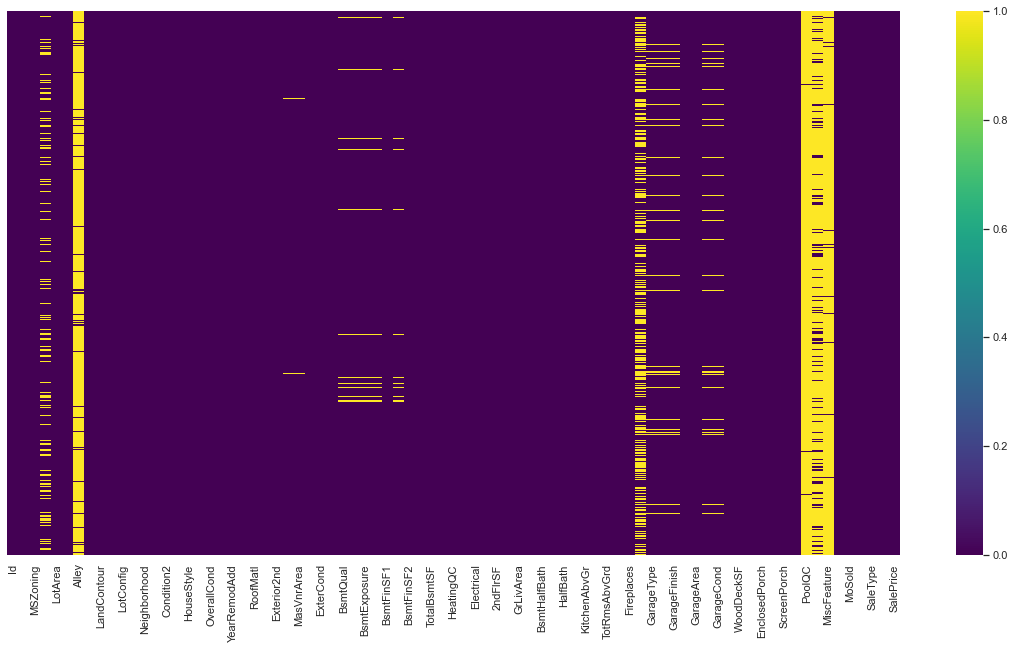

In [6]:
# Get the columns that have any missing values and its percentage
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [7]:
missing = pd.DataFrame(data.count(), columns=['Count'])
missing['Missing Values'] = len(data) - missing['Count']
missing['%Missing Values'] = (missing['Missing Values'] / len(data)) * 100

missing['%Missing Values'].sort_values()

Id                0.000000
TotalBsmtSF       0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
                   ...    
FireplaceQu      47.260274
Fence            80.753425
Alley            93.767123
MiscFeature      96.301370
PoolQC           99.520548
Name: %Missing Values, Length: 81, dtype: float64

In [8]:
percentage_nullValues(data)

,Percentage_NaN
PoolQC,99.5
MiscFeature,96.3
Alley,93.8
Fence,80.8
FireplaceQu,47.3
...,...
ExterQual,0.0
Exterior2nd,0.0
Exterior1st,0.0
RoofMatl,0.0


In [9]:
percentage_nullValues(data)

,Percentage_NaN
PoolQC,99.5
MiscFeature,96.3
Alley,93.8
Fence,80.8
FireplaceQu,47.3
...,...
ExterQual,0.0
Exterior2nd,0.0
Exterior1st,0.0
RoofMatl,0.0


In [10]:
missing = select_threshold(data, 20)
missing

Columns to keep: 76
Those columns have a percentage of NaN less than 20 :
['LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical', 'Id', 'Functional', 'Fireplaces', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageCars', 'GrLivArea', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'HeatingQC', 'LowQualFinSF', 'LandSlope', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig', 'YearBuilt', 'Utilities', 'LandContour', 'LotShape', 'Street', 'LotArea', 'MSZoning', 'OverallCond', 'YearRemodAdd', '2ndFlrSF', 'BsmtFinSF2', '1stFlrSF', 'CentralAir', 'MSSubClass', 'Heating', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFi

,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
0,65.0,2003.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,...,150,706,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,208500
1,80.0,1976.0,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,...,284,978,Gable,CBlock,TA,TA,MetalSd,MetalSd,CompShg,181500
2,68.0,2001.0,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,...,434,486,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,223500
3,60.0,1998.0,TA,Detchd,Unf,TA,Unf,No,TA,Gd,...,540,216,Gable,BrkTil,TA,TA,Wd Shng,Wd Sdng,CompShg,140000
4,84.0,2000.0,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,...,490,655,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,1999.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,...,953,0,Gable,PConc,TA,TA,VinylSd,VinylSd,CompShg,175000
1456,85.0,1978.0,TA,Attchd,Unf,TA,Rec,No,Gd,TA,...,589,790,Gable,CBlock,TA,TA,Plywood,Plywood,CompShg,210000
1457,66.0,1941.0,TA,Attchd,RFn,TA,Unf,No,TA,Gd,...,877,275,Gable,Stone,Gd,Ex,CmentBd,CemntBd,CompShg,266500
1458,68.0,1950.0,TA,Attchd,Unf,TA,Rec,Mn,TA,TA,...,0,49,Hip,CBlock,TA,TA,MetalSd,MetalSd,CompShg,142125


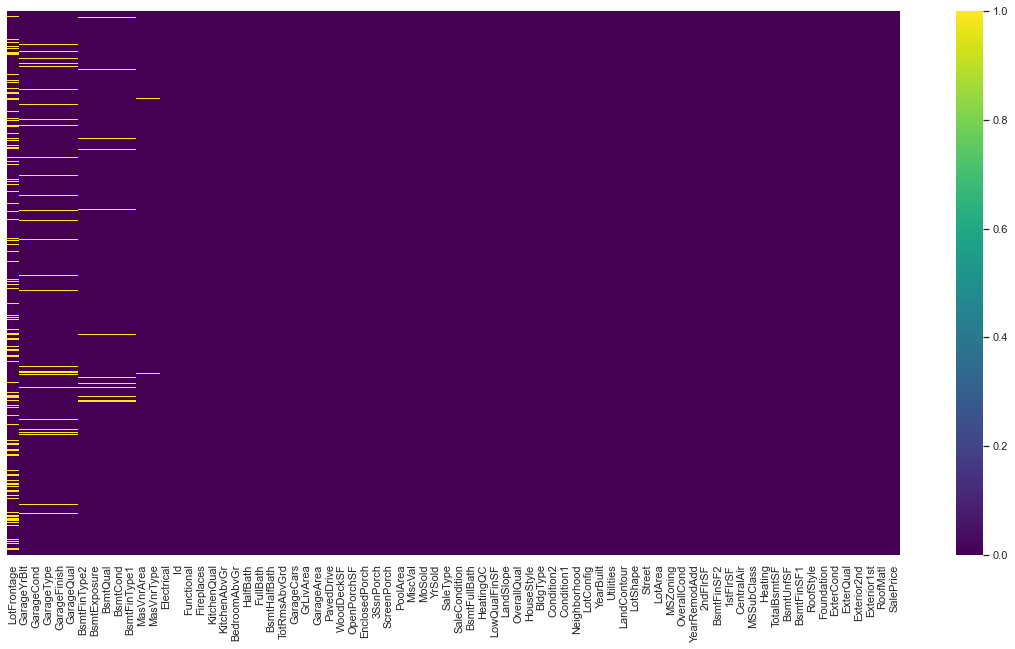

In [11]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(missing.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [12]:
percentage_nullValues(missing)

,Percentage_NaN
LotFrontage,17.7
GarageCond,5.5
GarageType,5.5
GarageFinish,5.5
GarageQual,5.5
...,...
BsmtFullBath,0.0
HeatingQC,0.0
LowQualFinSF,0.0
LandSlope,0.0


In [13]:
missing['LotFrontage'].head(20)

0     65.0
1     80.0
2     68.0
3     60.0
4     84.0
5     85.0
6     75.0
7      NaN
8     51.0
9     50.0
10    70.0
11    85.0
12     NaN
13    91.0
14     NaN
15    51.0
16     NaN
17    72.0
18    66.0
19    70.0
Name: LotFrontage, dtype: float64

In [14]:
 dc = fill_na(missing)

Number of missing values on your dataset are

LotFrontage     0
GarageYrBlt     0
GarageCond      0
GarageType      0
GarageFinish    0
               ..
ExterQual       0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64


### Perform and initially EDA of the dataset

### Study the variable target 

In [15]:
 dc.head()

,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
0,65.0,2003.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,...,150,706,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,208500
1,80.0,1976.0,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,...,284,978,Gable,CBlock,TA,TA,MetalSd,MetalSd,CompShg,181500
2,68.0,2001.0,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,...,434,486,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,223500
3,60.0,1998.0,TA,Detchd,Unf,TA,Unf,No,TA,Gd,...,540,216,Gable,BrkTil,TA,TA,Wd Shng,Wd Sdng,CompShg,140000
4,84.0,2000.0,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,...,490,655,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,250000


In [16]:
dc.isnull().sum()

LotFrontage     0
GarageYrBlt     0
GarageCond      0
GarageType      0
GarageFinish    0
               ..
ExterQual       0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

In [17]:
target = dc['SalePrice']

In [18]:
target.describe()
# The range is min: 34900 and max: 755000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

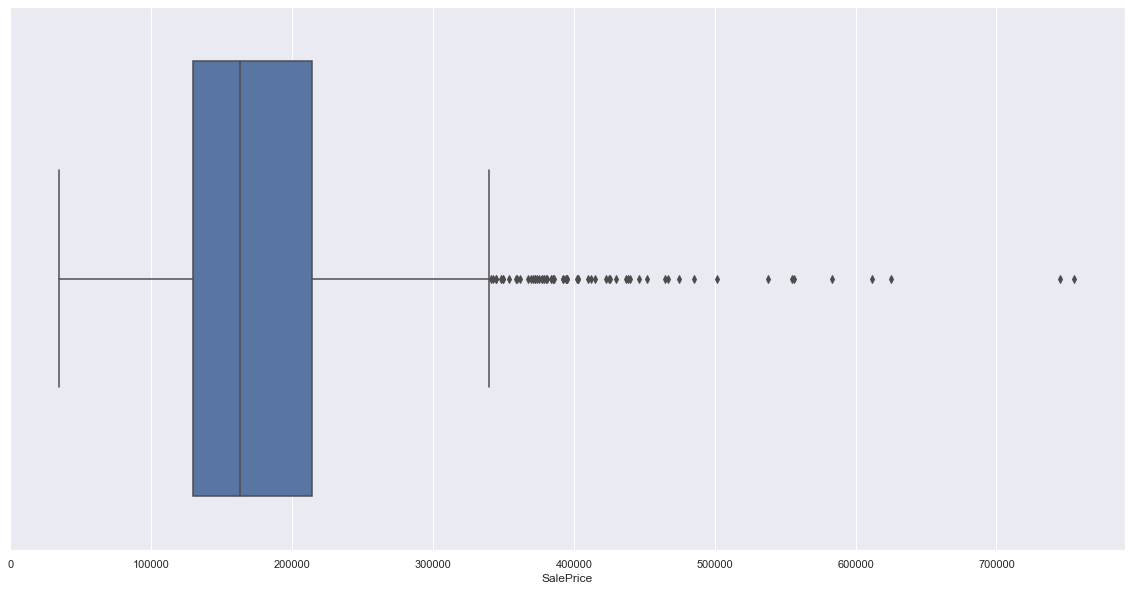

In [19]:
import seaborn as sns

ax = sns.boxplot(x=target)

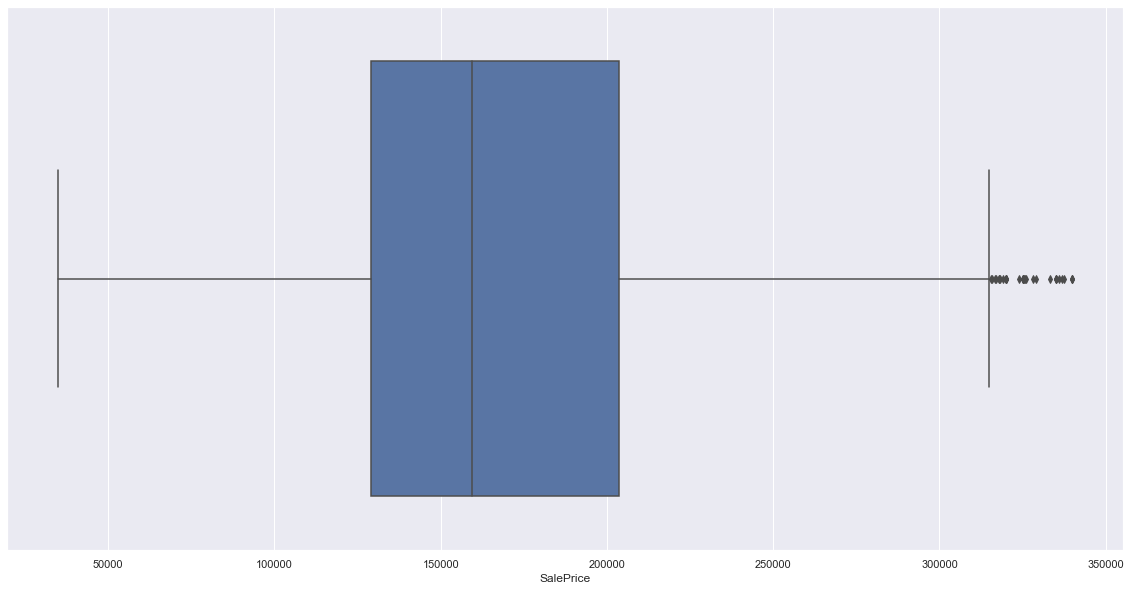

In [20]:
for column in dc: 
    if dc[column].dtype != 'object':
        Q1 = dc.quantile(.25)
        Q3 = dc.quantile(.75)
        IQR = Q3 - Q1
        #(Q1 - 1.5 * IQR) is a standard formula to rid of outliers
        lower_limit = (Q1 - 1.5 * IQR)
        upper_limit = (Q3 + 1.5 * IQR)
        dc_ICQ = dc[(dc > lower_limit) & (dc < upper_limit)]

ax = sns.boxplot(x=dc_ICQ['SalePrice'])

### Splitting to features and labels and deleting variables I don't need

In [21]:
# On the other hand, the rest of the data will be the features of the houses from which our model will learn
# what makes a house less or more expensive. We call this data our feature vector.

#features = dc.copy([''])

# We get rid of features that have more than half of missing information or do not correlate to SalePrice .. 
# How many can you find??

dc_corr_interest = dc.corr()['SalePrice']

In [22]:
dc_corr_interest

LotFrontage      0.334901
GarageYrBlt      0.470177
MasVnrArea       0.475241
Id              -0.021917
Fireplaces       0.466929
KitchenAbvGr    -0.135907
BedroomAbvGr     0.168213
HalfBath         0.284108
FullBath         0.560664
BsmtHalfBath    -0.016844
TotRmsAbvGrd     0.533723
GarageCars       0.640409
GrLivArea        0.708624
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
BsmtFullBath     0.227122
LowQualFinSF    -0.025606
OverallQual      0.790982
YearBuilt        0.522897
LotArea          0.263843
OverallCond     -0.077856
YearRemodAdd     0.507101
2ndFlrSF         0.319334
BsmtFinSF2      -0.011378
1stFlrSF         0.605852
MSSubClass      -0.084284
TotalBsmtSF      0.613581
BsmtUnfSF        0.214479
BsmtFinSF1       0.386420
SalePrice        1.000000
Name: SalePr

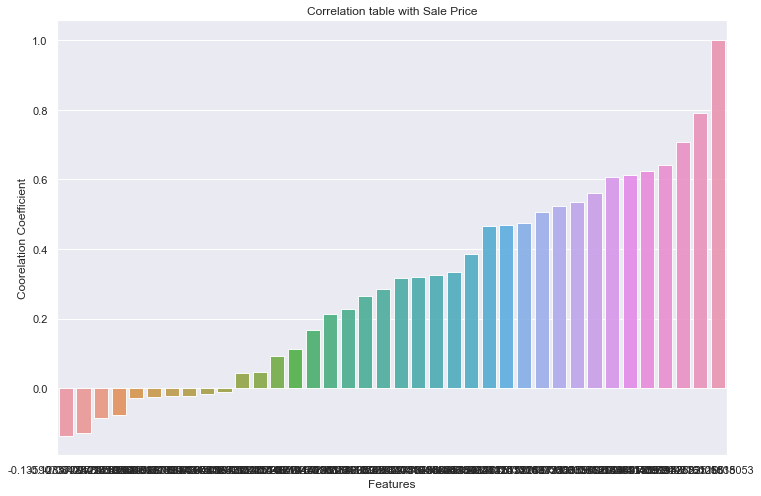

In [23]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.set(style="darkgrid")
sns.barplot(dc_corr_interest, dc_corr_interest.values, alpha=0.9)
plt.title('Correlation table with Sale Price')
plt.ylabel('Coorelation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)

plt.show()

In [24]:
print(dc_corr_interest[dc_corr_interest > 0.6])


GarageCars     0.640409
GrLivArea      0.708624
GarageArea     0.623431
OverallQual    0.790982
1stFlrSF       0.605852
TotalBsmtSF    0.613581
SalePrice      1.000000
Name: SalePrice, dtype: float64


### Scaling variables

In [25]:

dc_features = dc_ICQ[['GarageCars', 'GarageArea', 'GrLivArea', 'OverallQual', '1stFlrSF', 'TotalBsmtSF', 'SalePrice']]
dc_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageCars   1455 non-null   float64
 1   GarageArea   1439 non-null   float64
 2   GrLivArea    1429 non-null   float64
 3   OverallQual  1437 non-null   float64
 4   1stFlrSF     1440 non-null   float64
 5   TotalBsmtSF  1399 non-null   float64
 6   SalePrice    1399 non-null   float64
dtypes: float64(7)
memory usage: 80.0 KB


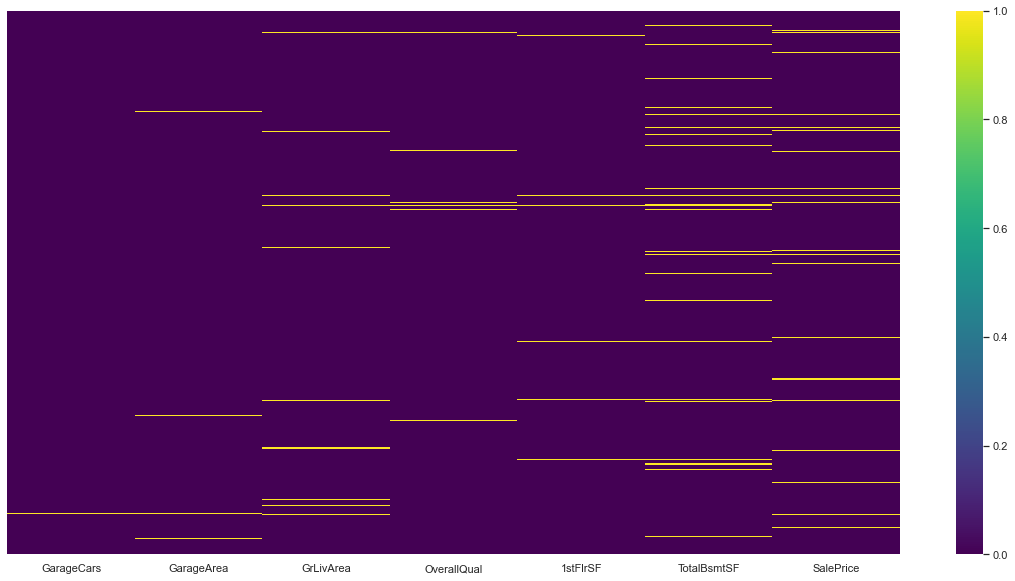

In [26]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(dc_features.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [27]:
percentage_nullValues(dc_features)

,Percentage_NaN
TotalBsmtSF,4.2
SalePrice,4.2
GrLivArea,2.1
OverallQual,1.6
GarageArea,1.4
1stFlrSF,1.4
GarageCars,0.3


In [28]:
dc_features.shape

(1460, 7)

In [29]:
dc_features = dc_features.dropna() 

In [30]:
dc_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageCars   1314 non-null   float64
 1   GarageArea   1314 non-null   float64
 2   GrLivArea    1314 non-null   float64
 3   OverallQual  1314 non-null   float64
 4   1stFlrSF     1314 non-null   float64
 5   TotalBsmtSF  1314 non-null   float64
 6   SalePrice    1314 non-null   float64
dtypes: float64(7)
memory usage: 82.1 KB


In [31]:
# Do we need to scale the other variables? Which variables can you scale?
dc_features.describe()

,GarageCars,GarageArea,GrLivArea,OverallQual,1stFlrSF,TotalBsmtSF,SalePrice
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,1.703957,452.798326,1449.050228,6.007610,1112.127093,1032.837900,170019.786149
std,0.694796,191.365549,424.127200,1.207972,317.157143,325.425896,57227.266892
min,0.000000,0.000000,520.000000,3.000000,483.000000,105.000000,34900.000000
25%,1.000000,312.000000,1120.250000,5.000000,864.000000,798.000000,130000.000000
50%,2.000000,466.000000,1429.500000,6.000000,1057.000000,975.000000,159500.000000
75%,2.000000,569.000000,1713.750000,7.000000,1326.250000,1240.000000,201000.000000
max,3.000000,936.000000,2730.000000,9.000000,2117.000000,2000.000000,340000.000000


In [32]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

### MinMaxScaler

In [33]:
#First let's drop our target variable!
df = dc_features
dfname= df.columns

# Initialise the Scaler 
scaler = MinMaxScaler() 

# Scale data 
data_scaled = scaler.fit_transform(df) #this only returns an array
data_scaled = pd.DataFrame(data_scaled, columns= dfname) #this transforms it back into the data frame with the column names selected previous above

In [34]:
data_scaled

,GarageCars,GarageArea,GrLivArea,OverallQual,1stFlrSF,TotalBsmtSF,SalePrice
0,0.666667,0.585470,0.538462,0.666667,0.228274,0.396306,0.568994
1,0.666667,0.491453,0.335747,0.500000,0.476744,0.610554,0.480498
2,0.666667,0.649573,0.572851,0.666667,0.267442,0.430079,0.618158
3,1.000000,0.685897,0.541629,0.666667,0.292534,0.343536,0.344477
4,1.000000,0.893162,0.759276,0.833333,0.405141,0.548813,0.705015
...,...,...,...,...,...,...,...
1309,0.666667,0.491453,0.509955,0.500000,0.287638,0.447493,0.459194
1310,0.666667,0.534188,0.702715,0.500000,0.973072,0.758311,0.573910
1311,0.333333,0.269231,0.823529,0.666667,0.431457,0.552507,0.759095
1312,0.333333,0.256410,0.252489,0.333333,0.364137,0.513456,0.351442


In [35]:
#this function get stats and make them into a list and put them into a new dataframe

def get_Stats(data):
    statist = []
    
    for col in data:
        min_var = data[col].min()
        mean_var = data[col].mean()
        max_var = data[col].max()
        list_metrics = [min_var, mean_var, max_var]
        statist.append(list_metrics)
        
    statist = pd.DataFrame(statist,columns = ['min', 'mean', 'max'], index = [data.columns])
    #print(statist)
    return statist

In [36]:
get_Stats(data_scaled)

,min,mean,max
GarageCars,0.0,0.567986,1.0
GarageArea,0.0,0.483759,1.0
GrLivArea,0.0,0.420385,1.0
OverallQual,0.0,0.501268,1.0
1stFlrSF,0.0,0.385023,1.0
TotalBsmtSF,0.0,0.489624,1.0
SalePrice,0.0,0.442870,1.0


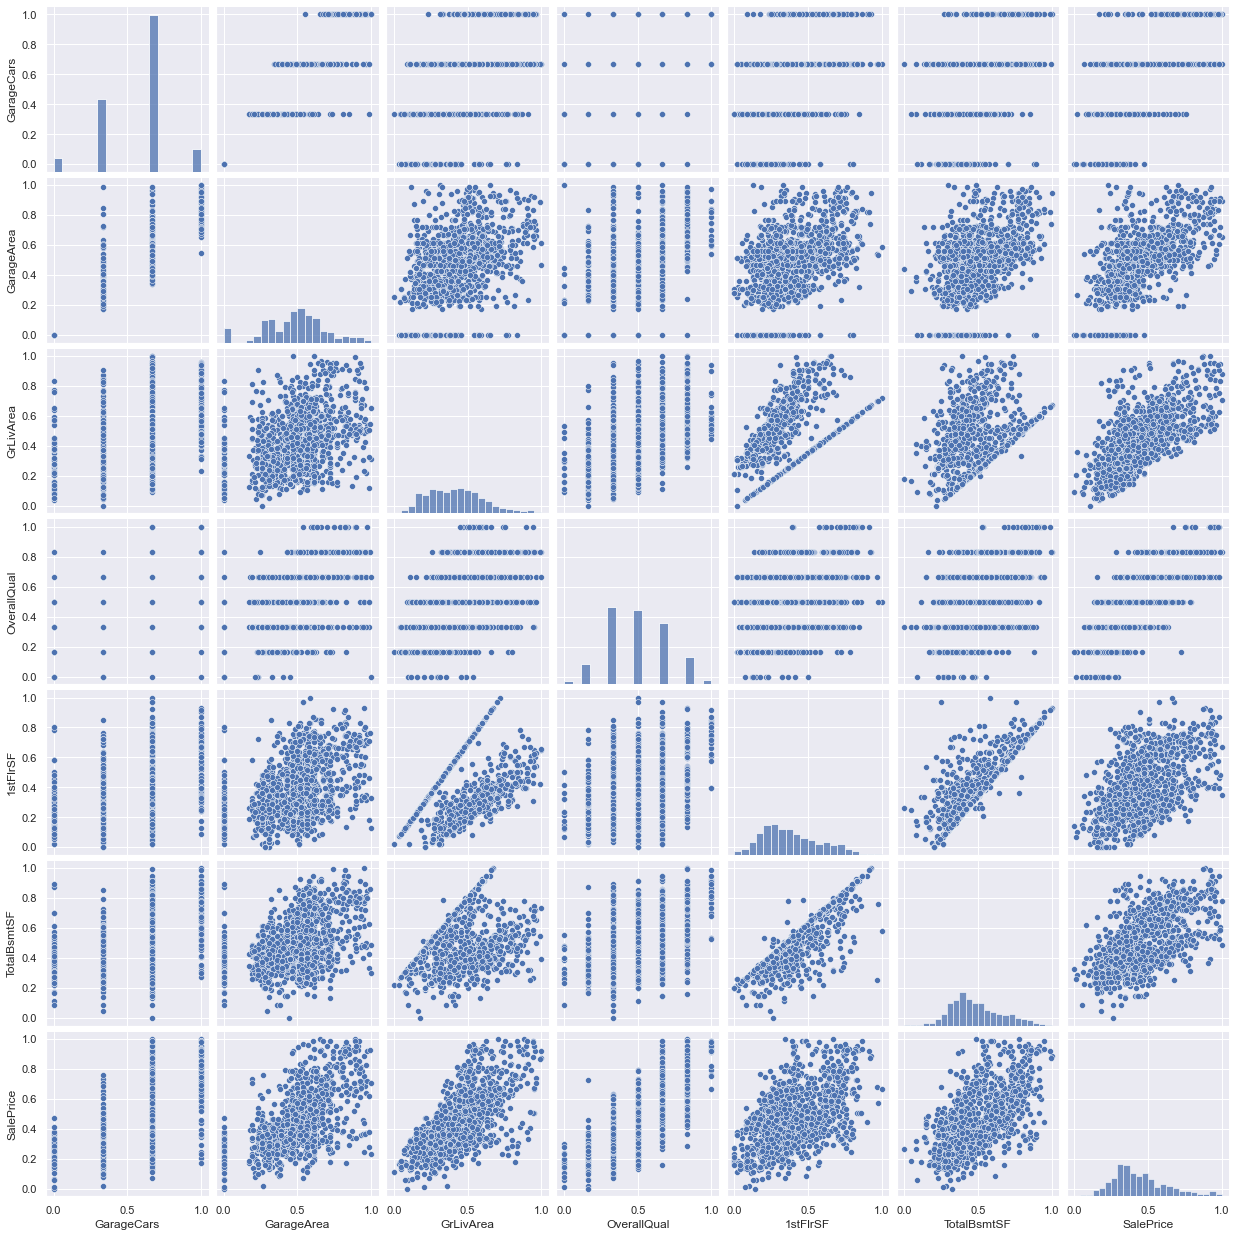

In [37]:
## Pairplot scaled data
sns.pairplot(data_scaled)

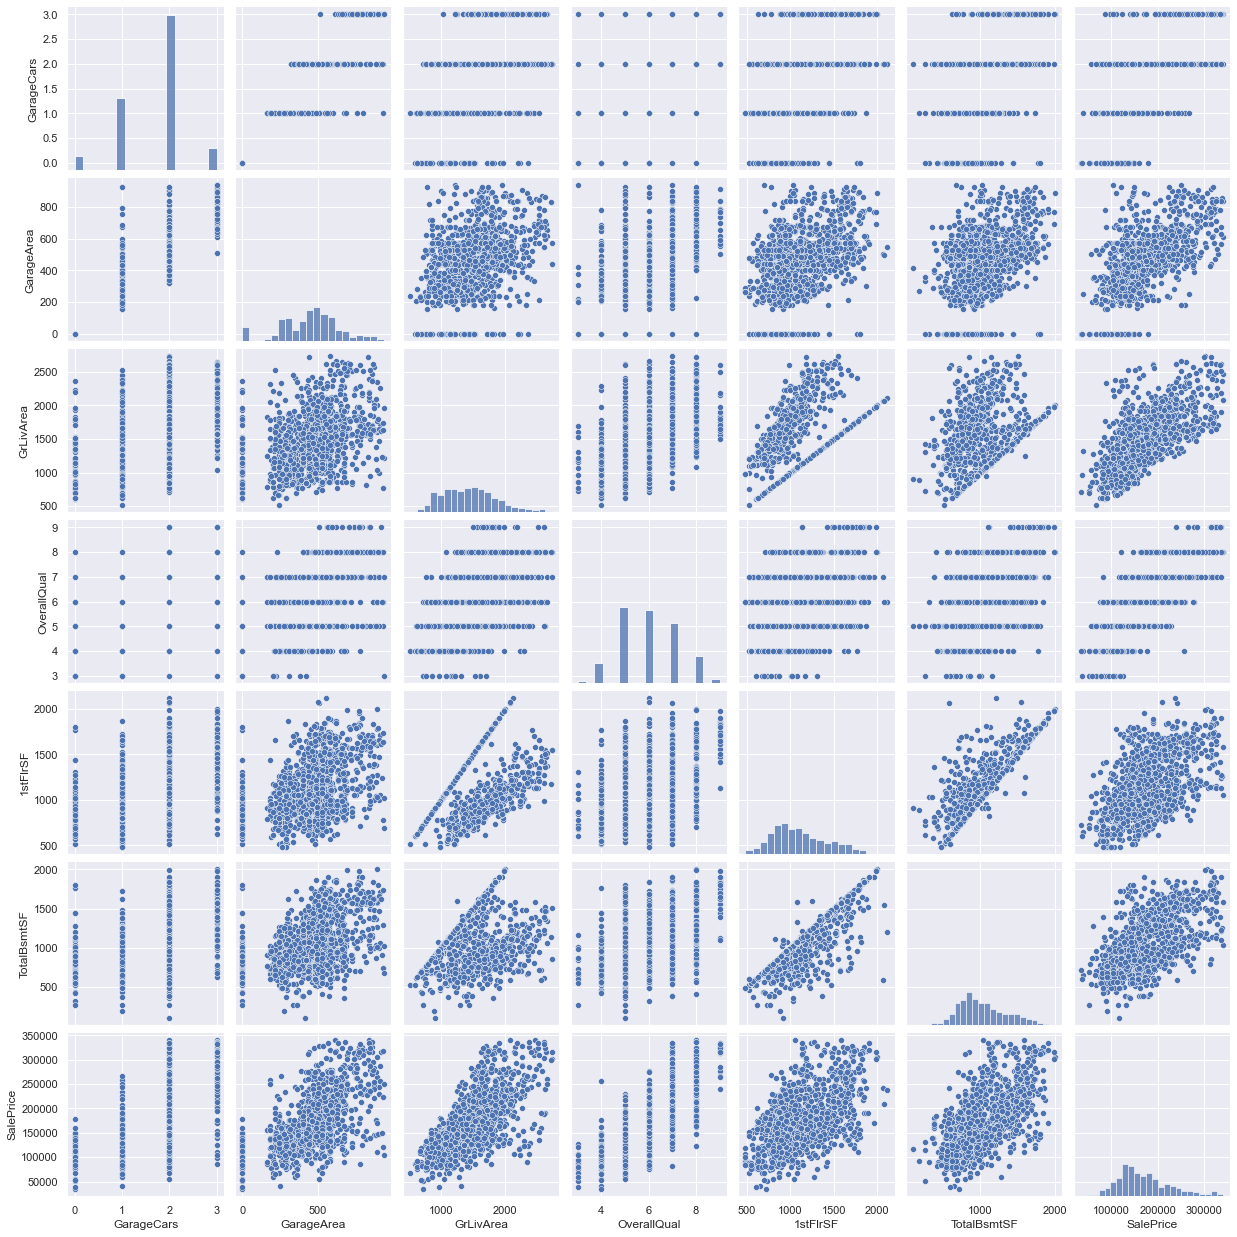

In [38]:
sns.pairplot(dc_features)

### RobustScaler

In [39]:
# Initialise the Scaler 
scaler = RobustScaler() 
  
# Scale data 
data_Rscaled = scaler.fit_transform(df)
data_Rscaled = pd.DataFrame(data_Rscaled, columns= dfname )

In [40]:
get_Stats(data_Rscaled)

,min,mean,max
GarageCars,-2.000000,-0.296043,1.000000
GarageArea,-1.813230,-0.051368,1.828794
GrLivArea,-1.532435,0.032941,2.191238
OverallQual,-1.500000,0.003805,1.500000
1stFlrSF,-1.241752,0.119258,2.293131
TotalBsmtSF,-1.968326,0.130855,2.319005
SalePrice,-1.754930,0.148166,2.542254


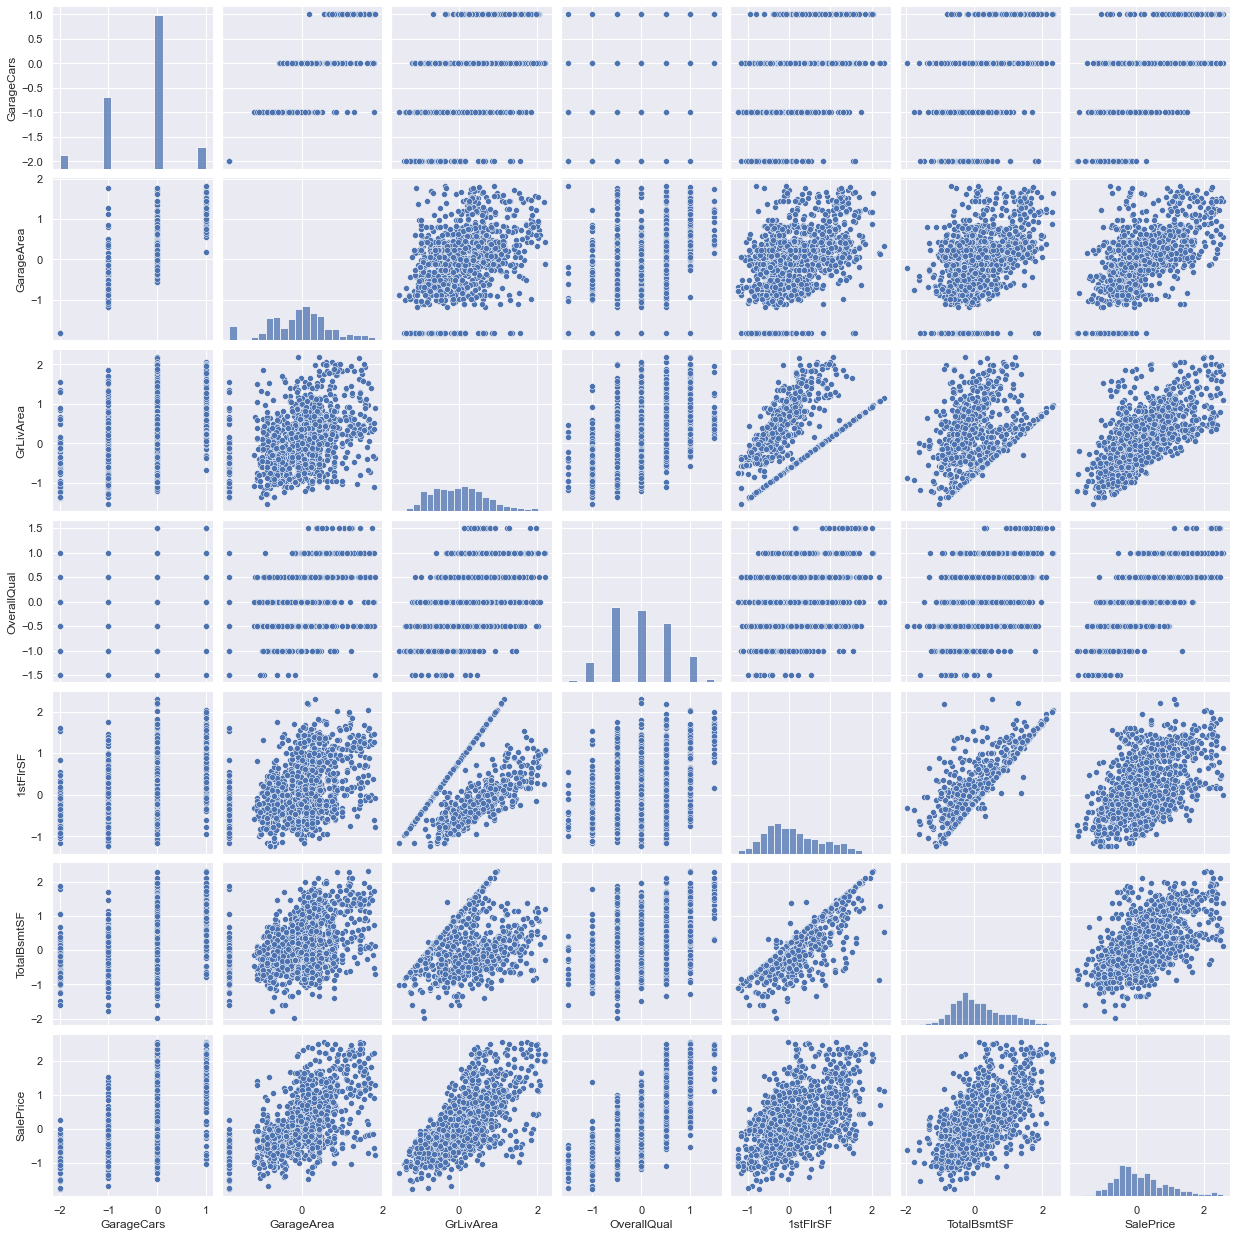

In [41]:
sns.pairplot(data_Rscaled)

### StandardScaler

In [42]:
# Initialise the Scaler 
scaler = StandardScaler() 
  
# Scale data 
data_Sscaled = scaler.fit_transform(df)
data_Sscaled = pd.DataFrame(data_Sscaled, columns= dfname )

In [43]:
get_Stats(data_Sscaled)

,min,mean,max
GarageCars,-2.453391,-4.055609e-18,1.866067
GarageArea,-2.367044,1.567324e-16,2.525981
GrLivArea,-2.191333,1.418196e-16,3.021352
OverallQual,-2.490750,-2.372531e-16,2.478145
1stFlrSF,-1.984400,1.009678e-16,3.169582
TotalBsmtSF,-2.852235,-2.506029e-16,2.973120
SalePrice,-2.362007,8.918116e-17,2.971397


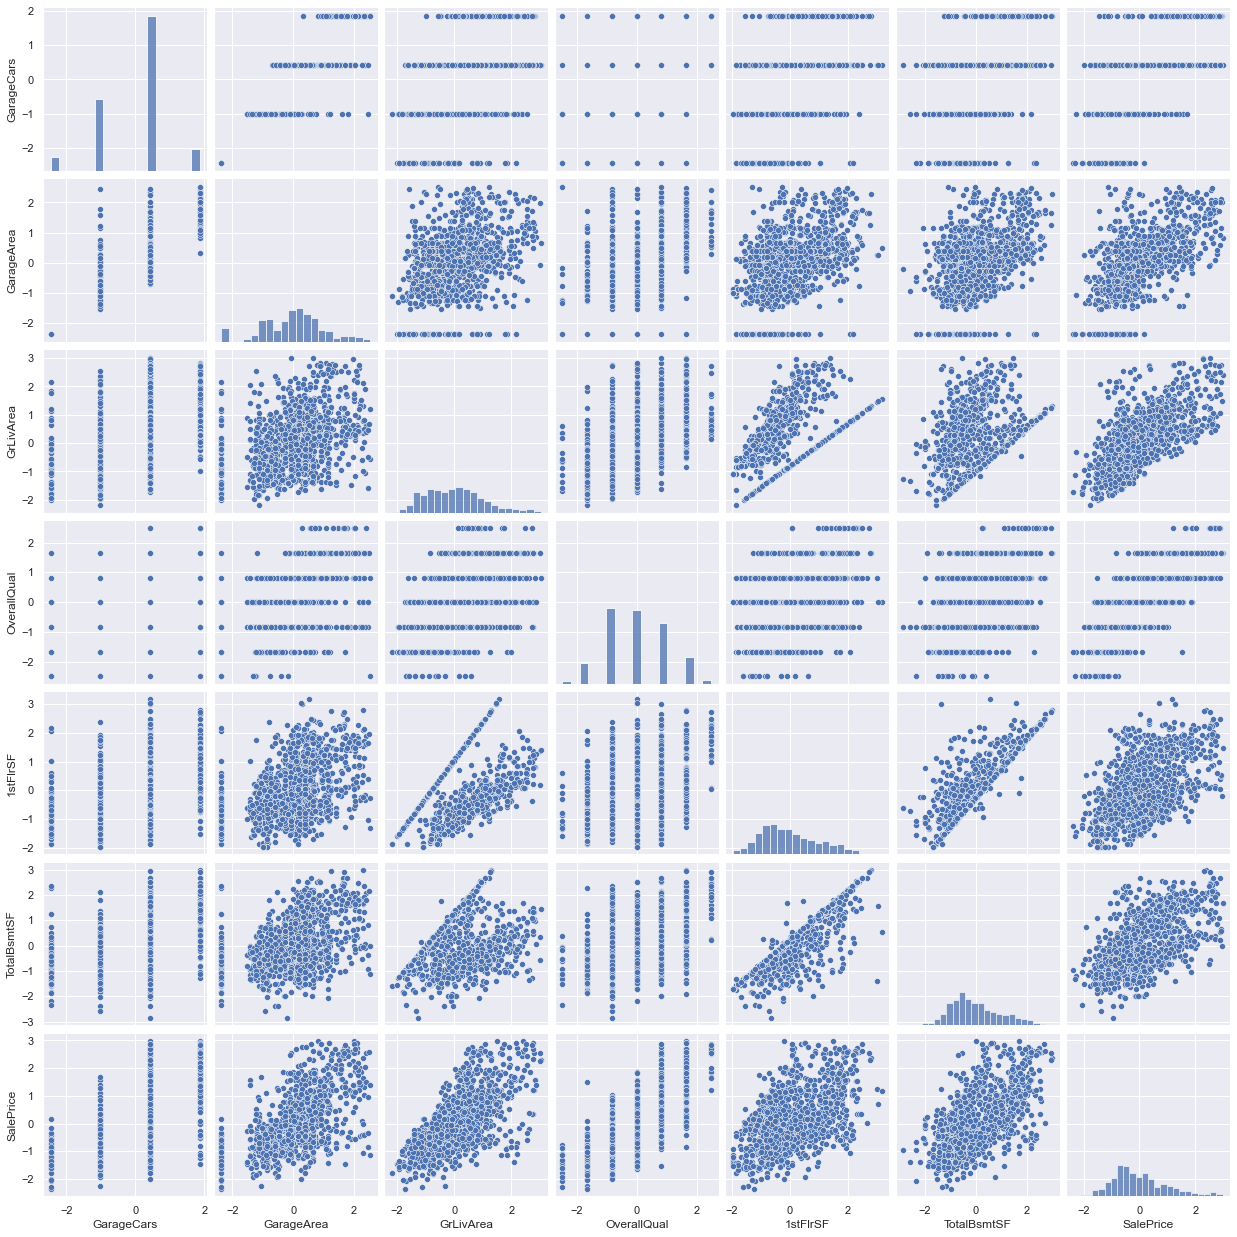

In [44]:
sns.pairplot(data_Sscaled)

<AxesSubplot:>

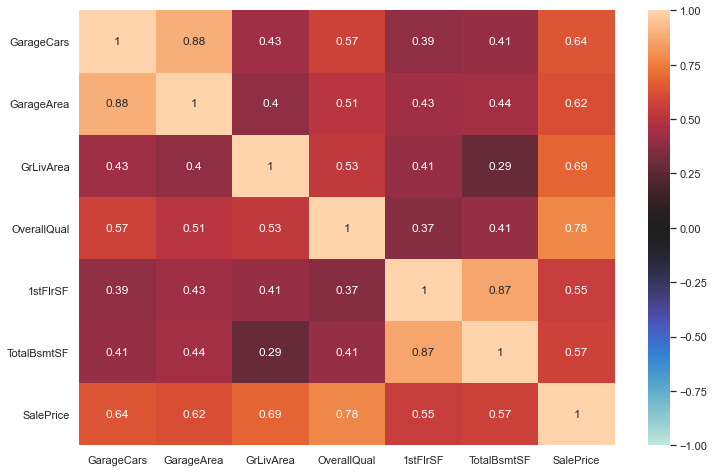

In [45]:
plt.figure(figsize=(12,8))
df_corr = df.corr()
sns.heatmap(df_corr,
           xticklabels = df_corr.columns.values,
           yticklabels = df_corr.columns.values,
           annot = True, vmax=1, vmin=-1, center=0)


## Categorical data

### Converting categorical data to dummies

In [46]:
# Getting Dummies from all other categorical vars

# Lets get dummies from the following category
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   GarageYrBlt    1460 non-null   float64
 2   GarageCond     1460 non-null   object 
 3   GarageType     1460 non-null   object 
 4   GarageFinish   1460 non-null   object 
 5   GarageQual     1460 non-null   object 
 6   BsmtFinType2   1460 non-null   object 
 7   BsmtExposure   1460 non-null   object 
 8   BsmtQual       1460 non-null   object 
 9   BsmtCond       1460 non-null   object 
 10  BsmtFinType1   1460 non-null   object 
 11  MasVnrArea     1460 non-null   float64
 12  MasVnrType     1460 non-null   object 
 13  Electrical     1460 non-null   object 
 14  Id             1460 non-null   int64  
 15  Functional     1460 non-null   object 
 16  Fireplaces     1460 non-null   int64  
 17  KitchenQual    1460 non-null   object 
 18  KitchenA

In [47]:
dc_categorical = dc[['Neighborhood' , 'Condition1', 'Condition2', 'MSZoning', 'SalePrice']]

dc_categorical.nunique()

Neighborhood     25
Condition1        9
Condition2        8
MSZoning          5
SalePrice       663
dtype: int64

In [48]:
print(dc_categorical['Neighborhood'].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


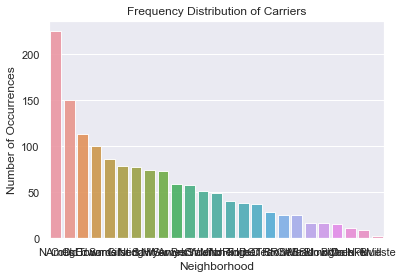

In [49]:
%matplotlib inline

dc_count = dc_categorical['Neighborhood'].value_counts()
sns.set(style="darkgrid")
sns.barplot(dc_count.index, dc_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Neighborhood', fontsize=12)
plt.show()


In [50]:
dc_le = dc_categorical.copy()

from sklearn.preprocessing import LabelEncoder

# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
dc_le['Neighborhood_Code'] = lb_make.fit_transform(dc_le['Neighborhood'])
dc_le['Condition1_Code'] = lb_make.fit_transform(dc_le['Condition1'])
dc_le['Condition2_Code'] = lb_make.fit_transform(dc_le['Condition2'])
dc_le['MSZoning_Code'] = lb_make.fit_transform(dc_le['MSZoning'])

dc_le.head() #Results in appending a new column to df

,Neighborhood,Condition1,Condition2,MSZoning,SalePrice,Neighborhood_Code,Condition1_Code,Condition2_Code,MSZoning_Code
0,CollgCr,Norm,Norm,RL,208500,5,2,2,3
1,Veenker,Feedr,Norm,RL,181500,24,1,2,3
2,CollgCr,Norm,Norm,RL,223500,5,2,2,3
3,Crawfor,Norm,Norm,RL,140000,6,2,2,3
4,NoRidge,Norm,Norm,RL,250000,15,2,2,3


In [51]:
dc_corr_interest2 = dc_le.corr()['SalePrice']
dc_corr_interest2

SalePrice            1.000000
Neighborhood_Code    0.210851
Condition1_Code      0.091155
Condition2_Code      0.007513
MSZoning_Code       -0.166872
Name: SalePrice, dtype: float64

### Save the dataset in a new csv

In [52]:
# dc_le.to_csv('Data_Cleaned')